# Welcome to a new colab session

Read the parameters explainations. To make most of this project, first make sure everything works as expected.

Run all code cells `Runtime` > `Run all`. Make sure results directory is created and non-empty.

Next, to use own data. First - upload it;

Finally, change the parameters and run all cells again.

After execution has finished, check the `results` directory.

<br/>

*Happy analyzing!*

### Parameters definitions
**file_path** - Path to a file containing list of targets. Supported formats: `xlsx, csv`.   

**target_columns** - This field specifies column names containing the target protein IDs, should be unirpot accession codes. If multiple xlsx sheets are used, use a column names list.   

**organism** -   This field specifies an organism to filter targets by origin.  

**skip_sheet** -  Specify sheet/table name containing headers.   

**skip_rows** -   If input data (sheet) contains a header, specify amount of rows to skip.   

**verbose** -  If True, prints logs in the cell output.

In [ ]:
#@title Setup parameters

file_path = "ni_victoria/datasets/targets-sample.xlsx" #@param {type:"string"}

target_columns = "Uniprot ID, Query, Uniprot_ID" # @param {"type":"string","placeholder":"UniProt Accession"}

organism = "hsa" # @param {"type":"string","placeholder":"e.g. \"hsa\" for human"}

#@markdown *Optional Fields*
skip_sheet = "SwissTarget" #@param {type:"string"}

skip_rows = 1 #@param {type:"integer"}

verbose=True #@param {type:"boolean"}

processed_dir = "results/processed"
results_dir = "results"


In [ ]:
#@title Install Requirements { display-mode : "form" }

!git clone -b main https://github.com/ststevanovic/ni_victoria.git
!pip install -r ni_victoria/requirements.txt

Cloning into 'ni_victoria'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 28 (delta 4), reused 28 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (28/28), 22.54 KiB | 3.76 MiB/s, done.
Resolving deltas: 100% (4/4), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.5/548.5 kB 17.9 MB/s eta 0:00:00


In [ ]:
%%capture
#@title Import libriaries { display-mode : "form" }

import importlib
import ni_victoria.src.data as data
import ni_victoria.src.proc as proc
import ni_victoria.src.enrichment as enrichment

importlib.reload(data)
importlib.reload(proc)
importlib.reload(enrichment)

In [ ]:
#@title Load Data

#@markdown * Read dataset file in specific format.
#@markdown * Process and save target identifiers as a list to a file.


from ni_victoria.src.data import Dataset, DatasetUtils


kwargs = {
    "path": file_path,
    "usecols": list(map(str.strip, target_columns.split(",")))
}

if skip_rows is not None:
    kwargs["skiprows"] = skip_rows

if skip_sheet is not None:
    kwargs["skip_sheet"] = skip_sheet

testdata = Dataset(**kwargs).load()

DatasetUtils().save_data(testdata, processed_dir, "targets.txt")

In [ ]:
#@title KEGG queries
#@markdown * Collect KEGG identifiers for each target in group
#@markdown * Apply organism specific filtering
#@markdown * Collect gene names
#@markdown * Collect pathways names


from ni_victoria.src.proc import KeggOperations
from ni_victoria.src.data import DatasetUtils

my_kegg = KeggOperations (
            output = processed_dir,
            uniprot_ids= testdata,
            organism = organism,
            download=download,
            verbose=verbose
        )

my_kegg.query_batch()


# This lines saves kegg mapping to location
DatasetUtils().save_mapping(my_kegg, processed_dir)

  0%|          | 0/10 [00:00<?, ?it/s]

Multiple results found for P51812
Querying KEGG_ID - {'hsa:6197'}


 10%|█         | 1/10 [00:03<00:28,  3.14s/it]

Found pathways - 1 retries
Query P51812 - completed.


 20%|██        | 2/10 [00:03<00:12,  1.52s/it]

Filtered - Q9QZN9


 30%|███       | 3/10 [00:03<00:06,  1.01it/s]

Filtered - Q8I6E4_LEIIN
Multiple results found for P62942
Querying KEGG_ID - {'hsa:2280'}
No pathway found: hsa:2280
Querying KEGG_ID - {'hsa:51327'}
No pathway found: hsa:51327
Querying KEGG_ID - {'hsa:2475'}


 40%|████      | 4/10 [00:07<00:13,  2.21s/it]

Found pathways - 3 retries
Query P62942 - completed.
Multiple results found for P08908
Querying KEGG_ID - {'hsa:3350'}


 50%|█████     | 5/10 [00:09<00:10,  2.15s/it]

Found pathways - 1 retries
Query P08908 - completed.


 60%|██████    | 6/10 [00:10<00:06,  1.54s/it]

Filtered - P19327


 70%|███████   | 7/10 [00:10<00:03,  1.16s/it]

Filtered - P28564
Multiple results found for P42345
Querying KEGG_ID - {'hsa:2475'}


 80%|████████  | 8/10 [00:13<00:03,  1.83s/it]

Found pathways - 1 retries
Query P42345 - completed.
Multiple results found for P78536
Querying KEGG_ID - {'hsa:6868'}


 90%|█████████ | 9/10 [00:16<00:01,  1.91s/it]

Found pathways - 1 retries
Query P78536 - completed.
Multiple results found for PRKDC_HUMAN
Multiple KEGG cross-references found for PRKDC_HUMAN
Querying KEGG_ID - {'hsa:5591'}


100%|██████████| 10/10 [00:21<00:00,  2.11s/it]


Found pathways - 1 retries
Query PRKDC_HUMAN - completed.
-- STATS -- 
 Total pathways avilable: 124 
Total unique pathways: 68


100%|██████████| 68/68 [01:00<00:00,  1.12it/s]


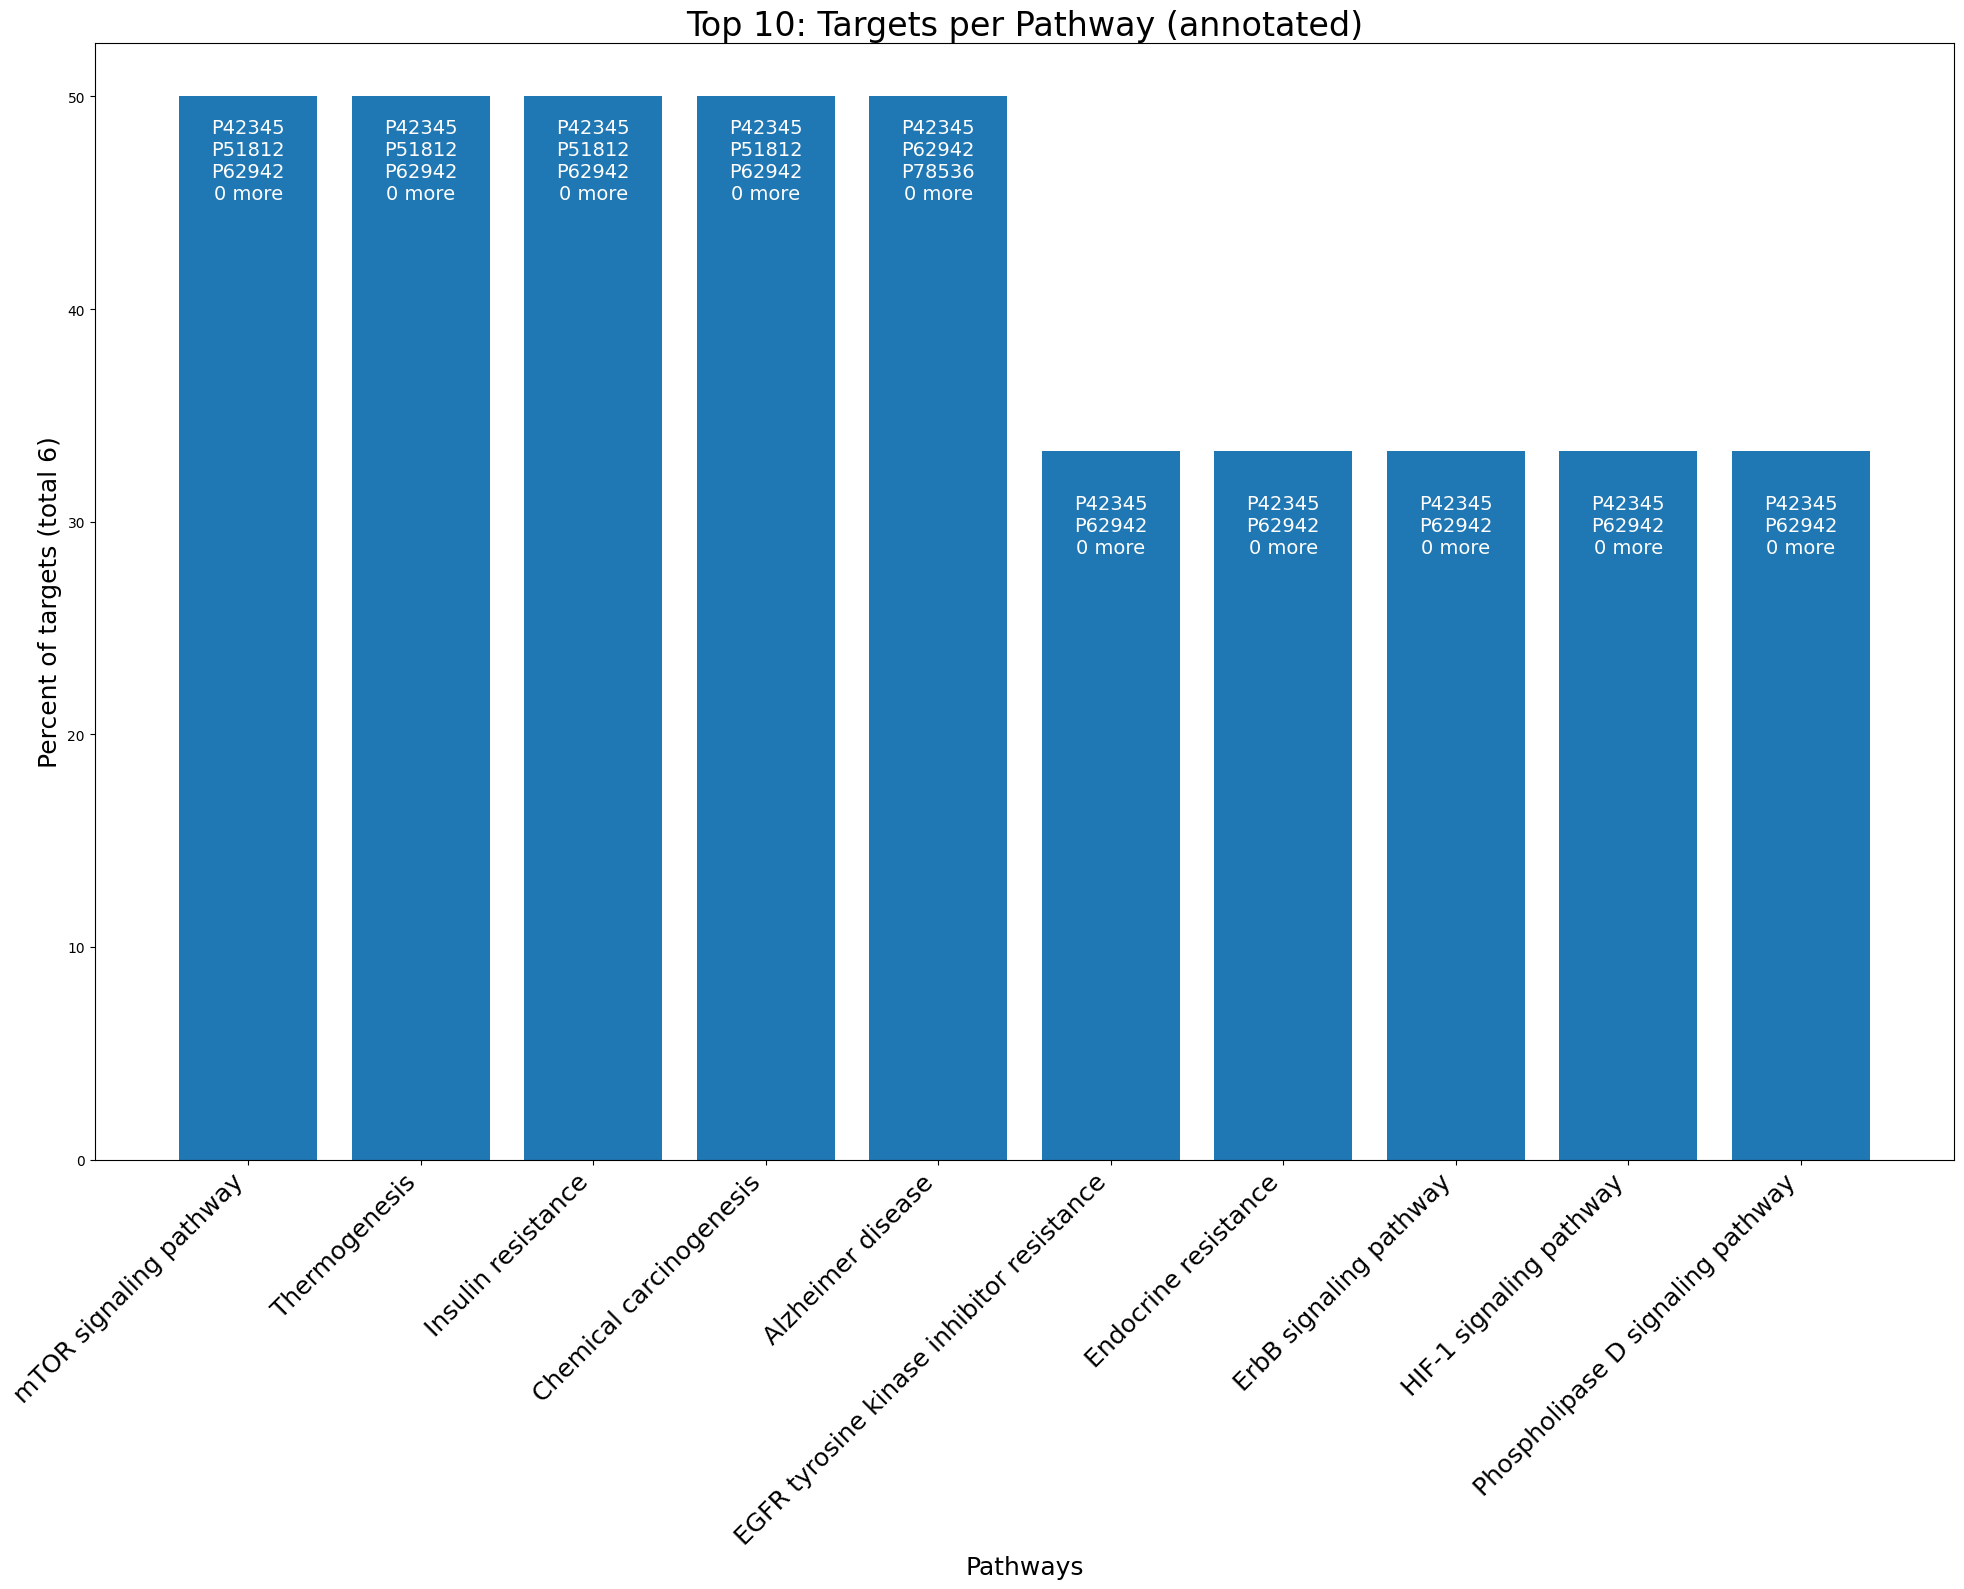

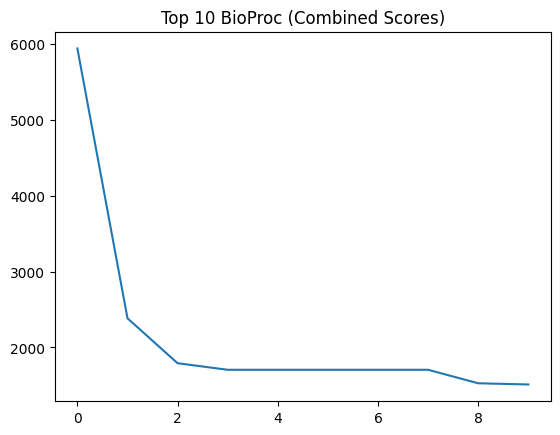

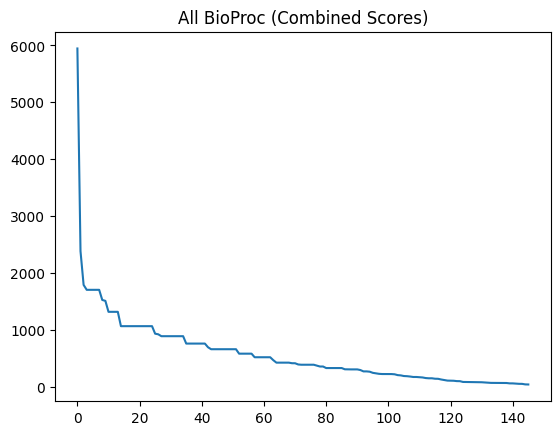

Top 10 Biological Process Terms:
  ------ establishment of centrosome localization (GO:0051660)
 positive regulation of vascular endothelial cell proliferation (GO:1905564)
 regulation of activin receptor signaling pathway (GO:0032925)
 negative regulation of calcium ion transport into cytosol (GO:0010523)
 receptor transactivation (GO:0035624)
 hemoglobin metabolic process (GO:0020027)
 serotonin metabolic process (GO:0042428)
 phenol-containing compound metabolic process (GO:0018958)
 regulation of vascular endothelial cell proliferation (GO:1905562)
 regulation of phosphoprotein phosphatase activity (GO:0043666) 
 ------


In [ ]:
#@title Enrichment application
#@markdown * Run enrichment for the provided group of targets.
#@markdown * Rank biological processes
#@markdown * Visualize with plots

# from ni_victoria.src.data import DatasetUtils
from ni_victoria.src.enrichment import Enrichment
from ni_victoria.src.data import DatasetUtils

# Sanity check and load saved processed data
my_kegg_loaded = DatasetUtils().load_mapping(processed_dir)

# Load pathways names
pathways_names = DatasetUtils().load_json(processed_dir, "pathways_names.json")

# Create Enrichment given processed data
my_enrichment = Enrichment(my_kegg_loaded, pathways_names, output=results_dir)

# Prepare enrichment for visualization
my_enrichment.process()
